# Data Cleaning

In [1]:
# Importing the required libraries
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer

# Display configurations
sns.set(font_scale=1.5)

pd.options.display.max_columns=200
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = None


In [4]:
# Read the dataset
dfr = pd.read_excel("../input/Real_Estate Data.xlsx" )

#### Preliminary exploration

In [5]:
# Check the shape of the data
dfr.shape

(200, 17)

In [6]:
# Check for the first 5 rows 
dfr.head()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [7]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sr. No.                           200 non-null    int64  
 1   Location                          200 non-null    object 
 2   Sub-Area                          200 non-null    object 
 3   Propert Type                      200 non-null    object 
 4   Property Area in Sq. Ft.          200 non-null    object 
 5   Price in lakhs                    200 non-null    object 
 6   Price in Millions                 199 non-null    float64
 7   Company Name                      200 non-null    object 
 8   TownShip Name/ Society Name       200 non-null    object 
 9   Total TownShip Area in Acres      51 non-null     float64
 10  ClubHouse                         200 non-null    object 
 11  School / University in Township   200 non-null    object 
 12  Hospital

In [8]:
# Rename the column "Propert Type" to "Property Type"
dfr.rename(columns={"Propert Type": "Property Type"}, inplace=True)


## Cleaning the property's characteristics 

In [9]:
# Check unique values in the "Property Type" column for cleaning
unique_property_types = dfr["Property Type"].unique()


array(['1 BHK', '2 BHK', '3 BHK', '3 BHK Grand', '2BHK', '3BHK', '4BHK',
       '5BHK', '6BHK', '1BHK', 'shop', '2 bhk', '2bhk ', '3  bhk ',
       '3 bhk', '2bhk', '2.5 BHK', '3 BHK ', '4 bhk', '1 bhk', '2.5 bhk',
       '1bhk', '3bhk', '3.5bhk', '3.5 bhk', '3bhk ', '2+2 bhk', '3+2bhk ',
       '2 bhk ', '5 bhk', '1bhk ', '4.5bhk', '4bhk'], dtype=object)

In [10]:
# Remove rows with "Property Type" equal to "shop" and display the shape of the DataFrame
dfr = dfr[dfr["Property Type"] != "shop"]
shape_after_filtering = dfr.shape

(199, 17)

In [11]:
# Check unique values in the "Property Area in Sq. Ft." column for cleaning
unique_property_areas = dfr["Property Area in Sq. Ft."].unique()


array([492, 774, 889, 1018, 743, 975, '877 to 912', '1077 to 1272', 905,
       1125, 1644, 2220, '662 to 845', '890 to 1212', 423, 665,
       '792 to 965', 462, 666, 750, 1030, 446, 796, 842, 865, 902, 1154,
       872, 934, 1088, 1109, 1163, 1419, 1485, 684, 990, 882, 1103, 543,
       '801 to 1125', '1272 to 2138', 320, 473, 581, 790, 820, 989, 1003,
       1182, 1579, 491, 659, 732, 809, 460, 734, 753, 675, 917, 670, 740,
       847, 936, 1032, 1698, 2267, 725, 731, 744, 923, 930, 792, 1180,
       860, 988, 1093, 456, 644, 785, 1060, 113, 664, 673, 682, 698, 1239,
       1315, 1388, 1463, 1671, 1687, 575, 751, 761, 871, 1166, 1206, 1272,
       1279, 646, 717, 436, 637, 642, 655, 668, 810, 735, 783, 805, 1074,
       1111, 535, 947, 697, 711, 980, 1400, 1772, 1662, 705, 726, 793,
       904, 1168, 1189, 479, 693, 808, 1086, 844, 873, 606, 611, 626, 691,
       835, 854, 715, '624 to 761', 968, 996, 1038, 489, 598, 616, 692,
       867, 908, 1624, 2043, 727, '561 to 902', '1056 to

In [12]:
import re
import numpy as np

def splitSum(e, flag=True):
    """
    Splits a string into numbers, calculates the total number of bedrooms or property area.

    Parameters:
        e (str): A string containing either the number of rooms or property area.
        flag (bool, optional): Indicates whether 'e' represents the number of bedrooms (True) or property area (False).

    Returns:
        float: The total number of bedrooms or property area.

    Note:
        - This function processes the input string by removing special characters and alphabetic characters.
        - It then splits the string into a list of numbers and calculates the sum of the numbers if 'flag' is True.
        - If 'flag' is False, it calculates the mean value of the numbers.
        - If any errors occur during processing, it returns 'np.nan' (Not a Number).
    """
    try:
        # Convert the input string to lowercase and remove certain special characters
        e = str(e).lower()
        e = re.sub(r"[,;@#?!&$+]+\ *", " ", e)
        e = re.sub(r"[a-z]+", " ", e)
        e = re.sub(r"\s\s", "", e)

        # Split the cleaned string into a list of numbers
        s2list = e.strip().split()

        # Calculate the sum of numbers if 'flag' is True, or mean if 'flag' is False
        e_norm = sum(s2list) if flag else sum(s2list) / len(s2list)
        return e_norm

    except:
        return np.nan

def normaliseProps(df):
    """
    Extracts the number of rooms from the 'Property Type' column and mean values for 'Property Area in Sq. Ft.'.

    Parameters:
        df (pandas.DataFrame): The input data as a Pandas DataFrame.

    Returns:
        pandas.DataFrame: A modified DataFrame with 'Property Type' and 'Property Area in Sq. Ft.' columns normalized.
    """
    data = df.copy()

    # Apply the splitSum function to 'Property Type' to extract the number of rooms
    data["Property Type"] = data["Property Type"].apply(splitSum)

    # Apply the splitSum function to 'Property Area in Sq. Ft.' to calculate the mean values
    data["Property Area in Sq. Ft."] = data["Property Area in Sq. Ft."].apply(lambda x: splitSum(x, False))

    return data


In [13]:
# Normalize the 'Property Type' and 'Property Area in Sq. Ft.' columns
df_norm = normaliseProps(dfr)


In [14]:
df_norm["Property Type"].unique()

array([1. , 2. , 3. , 4. , 5. , 6. , 2.5, 3.5, 4.5])

In [15]:
df_norm["Property Area in Sq. Ft."].unique()


array([ 492. ,  774. ,  889. , 1018. ,  743. ,  975. ,  894.5, 1174.5,
        905. , 1125. , 1644. , 2220. ,  753.5, 1051. ,  423. ,  665. ,
        878.5,  462. ,  666. ,  750. , 1030. ,  446. ,  796. ,  842. ,
        865. ,  902. , 1154. ,  872. ,  934. , 1088. , 1109. , 1163. ,
       1419. , 1485. ,  684. ,  990. ,  882. , 1103. ,  543. ,  963. ,
       1705. ,  320. ,  473. ,  581. ,  790. ,  820. ,  989. , 1003. ,
       1182. , 1579. ,  491. ,  659. ,  732. ,  809. ,  460. ,  734. ,
        753. ,  675. ,  917. ,  670. ,  740. ,  847. ,  936. , 1032. ,
       1698. , 2267. ,  725. ,  731. ,  744. ,  923. ,  930. ,  792. ,
       1180. ,  860. ,  988. , 1093. ,  456. ,  644. ,  785. , 1060. ,
        113. ,  664. ,  673. ,  682. ,  698. , 1239. , 1315. , 1388. ,
       1463. , 1671. , 1687. ,  575. ,  751. ,  761. ,  871. , 1166. ,
       1206. , 1272. , 1279. ,  646. ,  717. ,  436. ,  637. ,  642. ,
        655. ,  668. ,  810. ,  735. ,  783. ,  805. , 1074. , 1111. ,
      

In [16]:
df_norm.dtypes

Sr. No.                               int64
Location                             object
Sub-Area                             object
Property Type                       float64
Property Area in Sq. Ft.            float64
Price in lakhs                       object
Price in Millions                   float64
Company Name                         object
TownShip Name/ Society Name          object
Total TownShip Area in Acres        float64
ClubHouse                            object
School / University in Township      object
Hospital in TownShip                 object
Mall in TownShip                     object
Park / Jogging track                 object
Swimming Pool                        object
Gym                                  object
dtype: object

---

## Cleaning the outliers

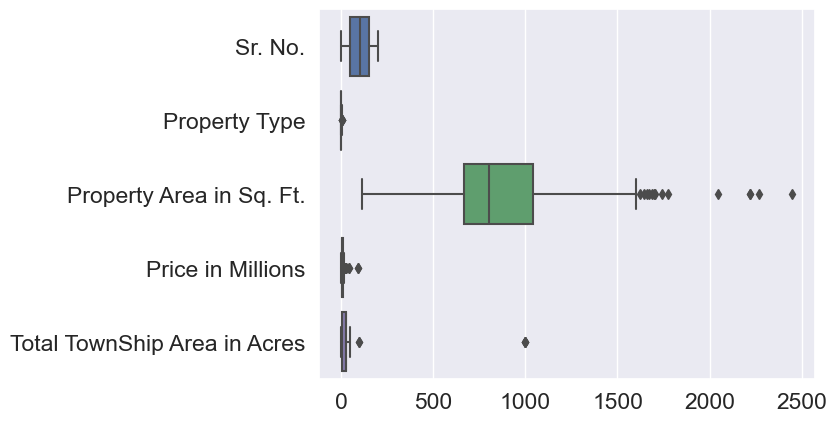

In [17]:
# Create a horizontal boxplot for the 'df_norm' DataFrame
sns.boxplot(data=df_norm, orient="h")

# Display the plot
plt.show()


In [18]:
def computeUpperFence(df_col, up=True):
    # Calculate the interquartile range (IQR)
    iqr = df_col.quantile(0.75) - df_col.quantile(0.25)
    
    if up:
        # Calculate and return the upper fence
        return df_col.quantile(0.75) + iqr * 1.5
    else:
        # Calculate and return the lower fence
        return df_col.quantile(0.25) - iqr * 1.5


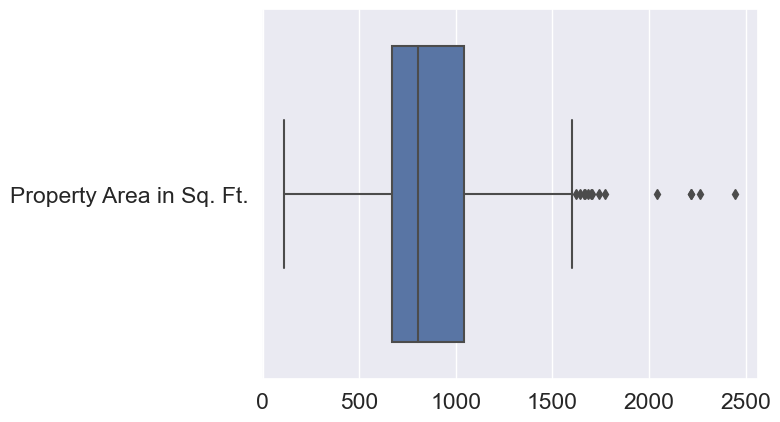

In [19]:
# Create a horizontal boxplot for the 'Property Area in Sq. Ft.' column
sns.boxplot(data=df_norm[["Property Area in Sq. Ft."]], orient="h")

# Display the plot to visualize potential outliers
plt.show()


In [20]:
# Get the 'Property Area in Sq. Ft.' column
x_pa = df_norm['Property Area in Sq. Ft.']

# Calculate the upper limit for atypical values
pa_up_lim = computeUpperFence(x_pa)

# Filter and display rows with 'Property Area in Sq. Ft.' values exceeding the upper limit
atypical_properties = df_norm[x_pa > pa_up_lim]

# Note: These values are atypical, not outliers, and they have many rooms.


,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
10,11,"Pune, Maharashtra, India",Ravet,4.0,1644.0,135,13.5,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
11,12,"Pune, Maharashtra, India",Ravet,5.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
12,13,"Pune, Maharashtra, India",Ravet,6.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
41,42,"Pune, Maharashtra, India",Keshav Nagar,3.0,1705.0,Null,NaN,Mantra Properties,Mantra Insignia,NaN,Yes,No,No,No,Yes,Yes,Yes
67,68,"Pune, Maharashtra, India",kayani nagar,3.0,1698.0,249,24.9,sagitarius ecospaces llp,bluegrass residences,NaN,yes,no,no,no,yes,yes,yes
68,69,"Pune, Maharashtra, India",kayani nagar,4.0,2267.0,460,46.0,sagitarius ecospaces llp,bluegrass residences,NaN,yes,no,no,no,yes,yes,yes
96,97,"Pune, Maharashtra, India",NIBM,3.5,1671.0,211,21.1,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes
97,98,"Pune, Maharashtra, India",NIBM,3.5,1687.0,213,21.3,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes
128,129,"Pune, Maharashtra, India",Hinjewadi,5.0,1772.0,177,17.7,Shapoorji Paloonji,Sensorium,NaN,yes,no,no,no,yes,yes,yes
131,132,"Pune, Maharashtra, India",hadapsar,5.0,1662.0,130,13.0,Wellwisher Apartments,kiarah terrazo,NaN,no,no,no,no,yes,no,no


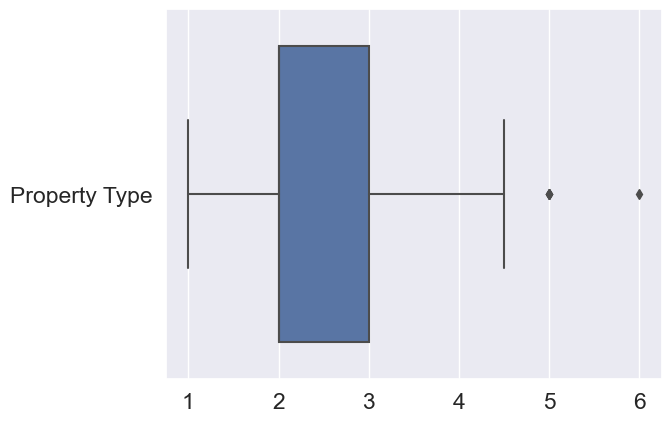

In [21]:
# Create a horizontal boxplot for the 'Property Type' column
sns.boxplot(data=df_norm[["Property Type"]], orient="h")

# Display the plot to visualize potential outliers or atypical values
plt.show()


In [22]:
# Get the 'Property Type' column
x_prt = df_norm['Property Type']

# Calculate the upper limit for atypical values
prt_up_lim = computeUpperFence(x_prt)

# Filter and display rows with 'Property Type' values exceeding the upper limit
atypical_properties = df_norm[x_prt > prt_up_lim]

# Note: These values are atypical, not outliers, and they have many rooms.


,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
11,12,"Pune, Maharashtra, India",Ravet,5.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
12,13,"Pune, Maharashtra, India",Ravet,6.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
50,51,"Pune, Maharashtra, India",Akurdi,5.0,1579.0,163,16.3,Mantra Properties,Mantra Sky Tower,3.5,Yes,No,No,No,Yes,Yes,Yes
128,129,"Pune, Maharashtra, India",Hinjewadi,5.0,1772.0,177,17.7,Shapoorji Paloonji,Sensorium,NaN,yes,no,no,no,yes,yes,yes
131,132,"Pune, Maharashtra, India",hadapsar,5.0,1662.0,130,13.0,Wellwisher Apartments,kiarah terrazo,NaN,no,no,no,no,yes,no,no


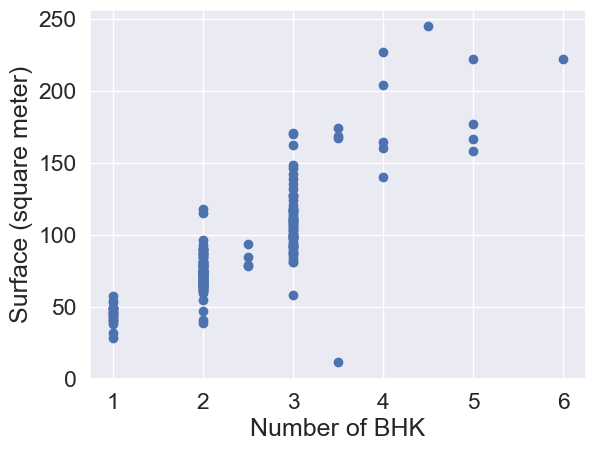

In [23]:
# Create a scatter plot to show the relationship between 'Number of BHK' and 'Surface (square meter)'
plt.scatter(df_norm["Property Type"], df_norm["Property Area in Sq. Ft."] * 0.1)

# Set labels for the axes
plt.xlabel("Number of BHK")
plt.ylabel("Surface (square meter)")

# Display the plot
plt.show()


In [24]:
df_norm.shape

(199, 17)

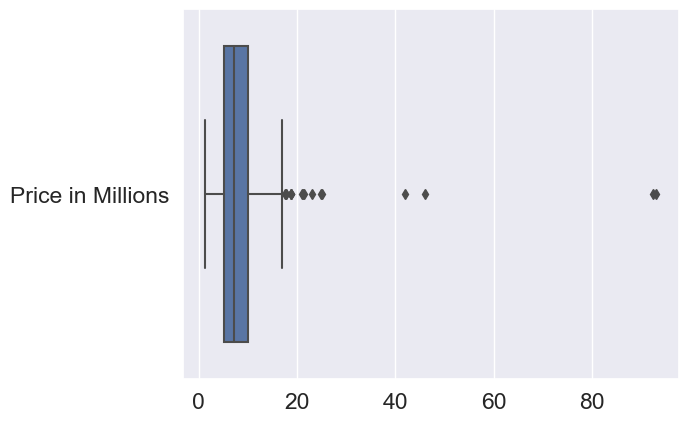

In [25]:
# Create a horizontal boxplot for the 'Price in Millions' column in the 'df_norm' DataFrame
sns.boxplot(data=df_norm[["Price in Millions"]], orient="h")

# Display the plot to visualize the distribution and potential outliers in prices
plt.show()


In [26]:
# Get the 'Price in Millions' column
x_pim = df_norm['Price in Millions']

# Calculate the upper limit for potential outliers
pim_up_lim = computeUpperFence(x_pim)

# Filter and display rows with 'Price in Millions' values exceeding the upper limit
potential_outliers = df_norm[x_pim > pim_up_lim]

# Note: Most of these values represent large apartments, except for 2 of them.


,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
11,12,"Pune, Maharashtra, India",Ravet,5.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
12,13,"Pune, Maharashtra, India",Ravet,6.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
67,68,"Pune, Maharashtra, India",kayani nagar,3.0,1698.0,249,24.9,sagitarius ecospaces llp,bluegrass residences,NaN,yes,no,no,no,yes,yes,yes
68,69,"Pune, Maharashtra, India",kayani nagar,4.0,2267.0,460,46.0,sagitarius ecospaces llp,bluegrass residences,NaN,yes,no,no,no,yes,yes,yes
73,74,"Pune, Maharashtra, India",pisoli,3.0,923.0,923,92.3,nirman developers,brookefield willows,NaN,yes,no,no,no,yes,yes,yes
74,75,"Pune, Maharashtra, India",pisoli,3.0,930.0,930,93.0,nirman developers,brookefield willows,NaN,yes,no,no,no,yes,yes,yes
94,95,"Pune, Maharashtra, India",NIBM,3.0,1388.0,178,17.8,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes
95,96,"Pune, Maharashtra, India",NIBM,3.0,1463.0,187,18.7,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes
96,97,"Pune, Maharashtra, India",NIBM,3.5,1671.0,211,21.1,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes
97,98,"Pune, Maharashtra, India",NIBM,3.5,1687.0,213,21.3,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes


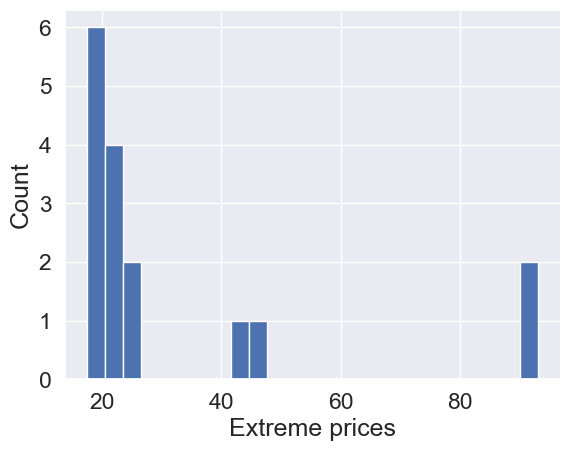

In [27]:
# Filter rows with 'Price in Millions' values exceeding the upper limit
extreme_prices = df_norm[x_pim > pim_up_lim]["Price in Millions"]

# Create a histogram to show the distribution of extreme prices
extreme_prices.hist(bins=25)

# Set labels for the axes
plt.xlabel("Extreme prices")
plt.ylabel("Count")

# Display the histogram
plt.show()


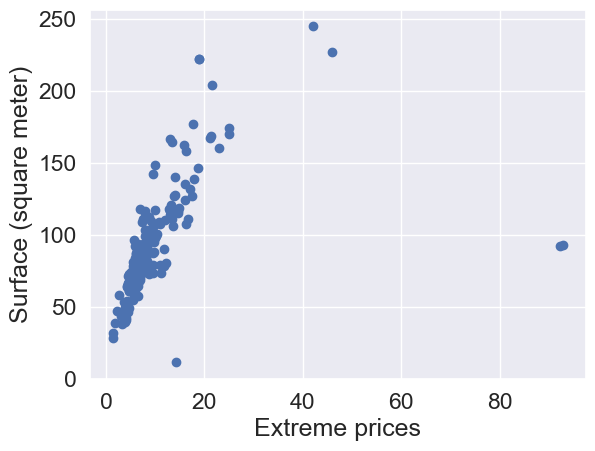

In [28]:
# Create a scatter plot to show the relationship between 'Extreme prices' and 'Surface (square meter)'
plt.scatter(df_norm["Price in Millions"], df_norm["Property Area in Sq. Ft."] * 0.1)

# Set labels for the axes
plt.xlabel("Extreme prices")
plt.ylabel("Surface (square meter)")

# Display the plot
plt.show()


In [29]:
# Filter the 'df_norm' DataFrame to include only rows with 'Price in Millions' less than 80
df_norm = df_norm[df_norm["Price in Millions"] < 80]


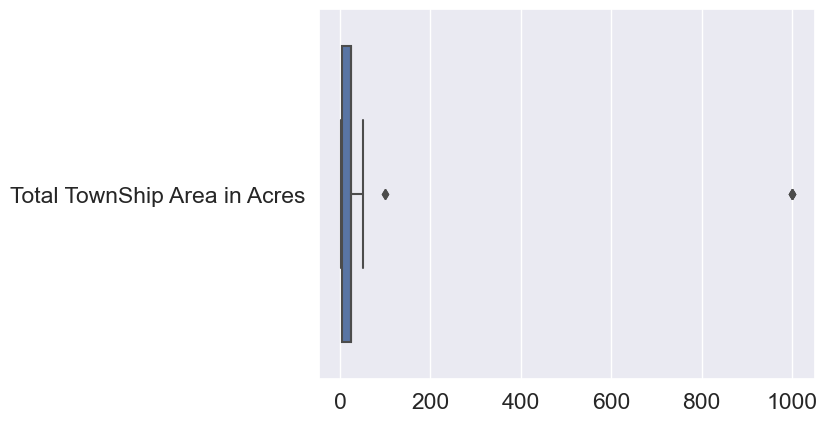

In [30]:
# Create a horizontal boxplot for the 'Total TownShip Area in Acres' column in the 'df_norm' DataFrame
sns.boxplot(data=df_norm[["Total TownShip Area in Acres"]], orient="h")

plt.show()


In [31]:
# Get the 'Total TownShip Area in Acres' column
x_tta = df_norm['Total TownShip Area in Acres']

# Calculate the upper limit for potential outliers
tta_up_lim = computeUpperFence(x_tta)

# Filter and display rows with 'Total TownShip Area in Acres' values exceeding the upper limit
potential_outliers = df_norm[x_tta > tta_up_lim]

# Note: Large cities are not considered outliers.


,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,"Pune, Maharashtra, India",Bavdhan,1.0,492.0,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2,"Pune, Maharashtra, India",Bavdhan,2.0,774.0,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,3,"Pune, Maharashtra, India",Bavdhan,3.0,889.0,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,4,"Pune, Maharashtra, India",Bavdhan,3.0,1018.0,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5,"Pune, Maharashtra, India",Mahalunge,2.0,743.0,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
5,6,"Pune, Maharashtra, India",Mahalunge,3.0,975.0,95,9.5,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [32]:
# Calculate the lower limit for small sub-areas
tta_low_lim = computeUpperFence(x_tta, up=False)

# Filter and display rows with 'Total TownShip Area in Acres' values falling below the lower limit
small_sub_areas = df_norm[x_tta < tta_low_lim]

# Note: These are small sub-areas.


,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
6,7,"Pune, Maharashtra, India",Balewadi,2.0,894.5,75,7.5,ANP CORP,ANP Universe,25.0,Yes,No,No,No,Yes,Yes,Yes
7,8,"Pune, Maharashtra, India",Balewadi,3.0,1174.5,100,10.0,ANP CORP,ANP Universe,25.0,Yes,No,No,No,Yes,Yes,Yes
8,9,"Pune, Maharashtra, India",Ravet,2.0,905.0,65,6.5,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
9,10,"Pune, Maharashtra, India",Ravet,3.0,1125.0,88,8.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
10,11,"Pune, Maharashtra, India",Ravet,4.0,1644.0,135,13.5,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
11,12,"Pune, Maharashtra, India",Ravet,5.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
12,13,"Pune, Maharashtra, India",Ravet,6.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
13,14,"Pune, Maharashtra, India",Baner,2.0,753.5,58,5.8,VTP Reality,VTP Cierra,10.0,Yes,No,No,No,Yes,Yes,Yes
14,15,"Pune, Maharashtra, India",Baner,3.0,1051.0,95,9.5,VTP Reality,VTP Cierra,10.0,Yes,No,No,No,Yes,Yes,Yes
15,16,"Pune, Maharashtra, India",Mahalunge,1.0,423.0,40,4.0,VTP Reality,VTP Blue Water,50.0,Yes,No,No,No,Yes,Yes,Yes


---

## Price selection

In [33]:
# Create a new column 'Price in lakhs' by converting the values to numeric format
df_norm["Price in lakhs"] = df_norm["Price in lakhs"].apply(lambda x: pd.to_numeric(x, errors='coerce'))


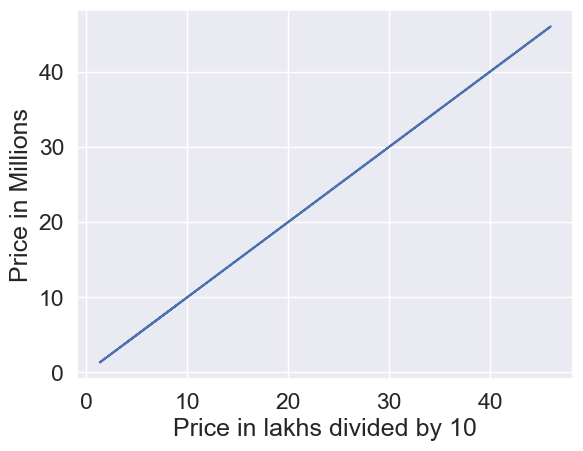

In [34]:
# Create a line plot to compare 'Price in lakhs' (scaled down by dividing by 10) with 'Price in Millions'
plt.plot(df_norm["Price in lakhs"] / 10.0, df_norm["Price in Millions"])

# Set labels for the axes
plt.xlabel("Price in lakhs divided by 10")
plt.ylabel("Price in Millions")

# Display the plot
plt.show()


In [35]:
# Drop the "Price in lakhs" column from the DataFrame
df_norm = df_norm.drop(columns=["Price in lakhs"])


---

## NaN values

In [36]:
# Function to compute the rate of non-NaN values for each column in the input DataFrame.
def compute_fill_rate(df):
    """
    Computes the rate of non-NaN values for each column in the input DataFrame.
    
    Parameters:
        df (pandas.DataFrame): Input data as a Pandas DataFrame.

    Returns:
        pandas.DataFrame: A DataFrame containing fill rates for each column.
    """
    # Calculate the fill rates for each column
    fill_rates = pd.DataFrame(1 - df.isnull().sum().values.reshape(1, -1) / df.shape[0], columns=df.columns)
    return fill_rates

# Function to plot the fill rate for each column in the input DataFrame.
def plot_fill_rate(df):
    """
    Plots the fill rate for each column in the input DataFrame.
    
    Parameters:
        df (pandas.DataFrame): Input data as a Pandas DataFrame.
    """
    # Calculate the fill rates using the compute_fill_rate function
    fill_rate = compute_fill_rate(df)
    
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(18, 18))
    
    # Create a horizontal bar plot to display the fill rates
    sns.barplot(data=fill_rate, orient="h")
    
    # Set the title and axis limits for the plot
    ax.set_title("Fill rate for columns", fontsize=28)
    ax.set(xlim=(0, 1))

# Function to drop axes (columns or rows) that do not meet the minimum non-NaN rate.
def drop_empty_axis(df, minFillRate, axis=1):
    """
    Drops axes (columns or rows) that do not meet the minimum non-NaN rate.

    Parameters:
        df (pandas.DataFrame): Input data as a Pandas DataFrame.
        minFillRate (float): Minimum filled fraction, should be in the range [0, 1].
        axis (int): 1 for column, 0 for row.

    Returns:
        pandas.DataFrame: A modified DataFrame with dropped columns or rows.
    """
    # Determine the axis (column or row) to drop based on the 'axis' parameter
    i = 0 if axis == 1 else 1
    
    # Drop columns or rows that do not meet the minimum fill rate threshold
    return df.dropna(axis=axis, thresh=int(df.shape[i] * minFillRate))


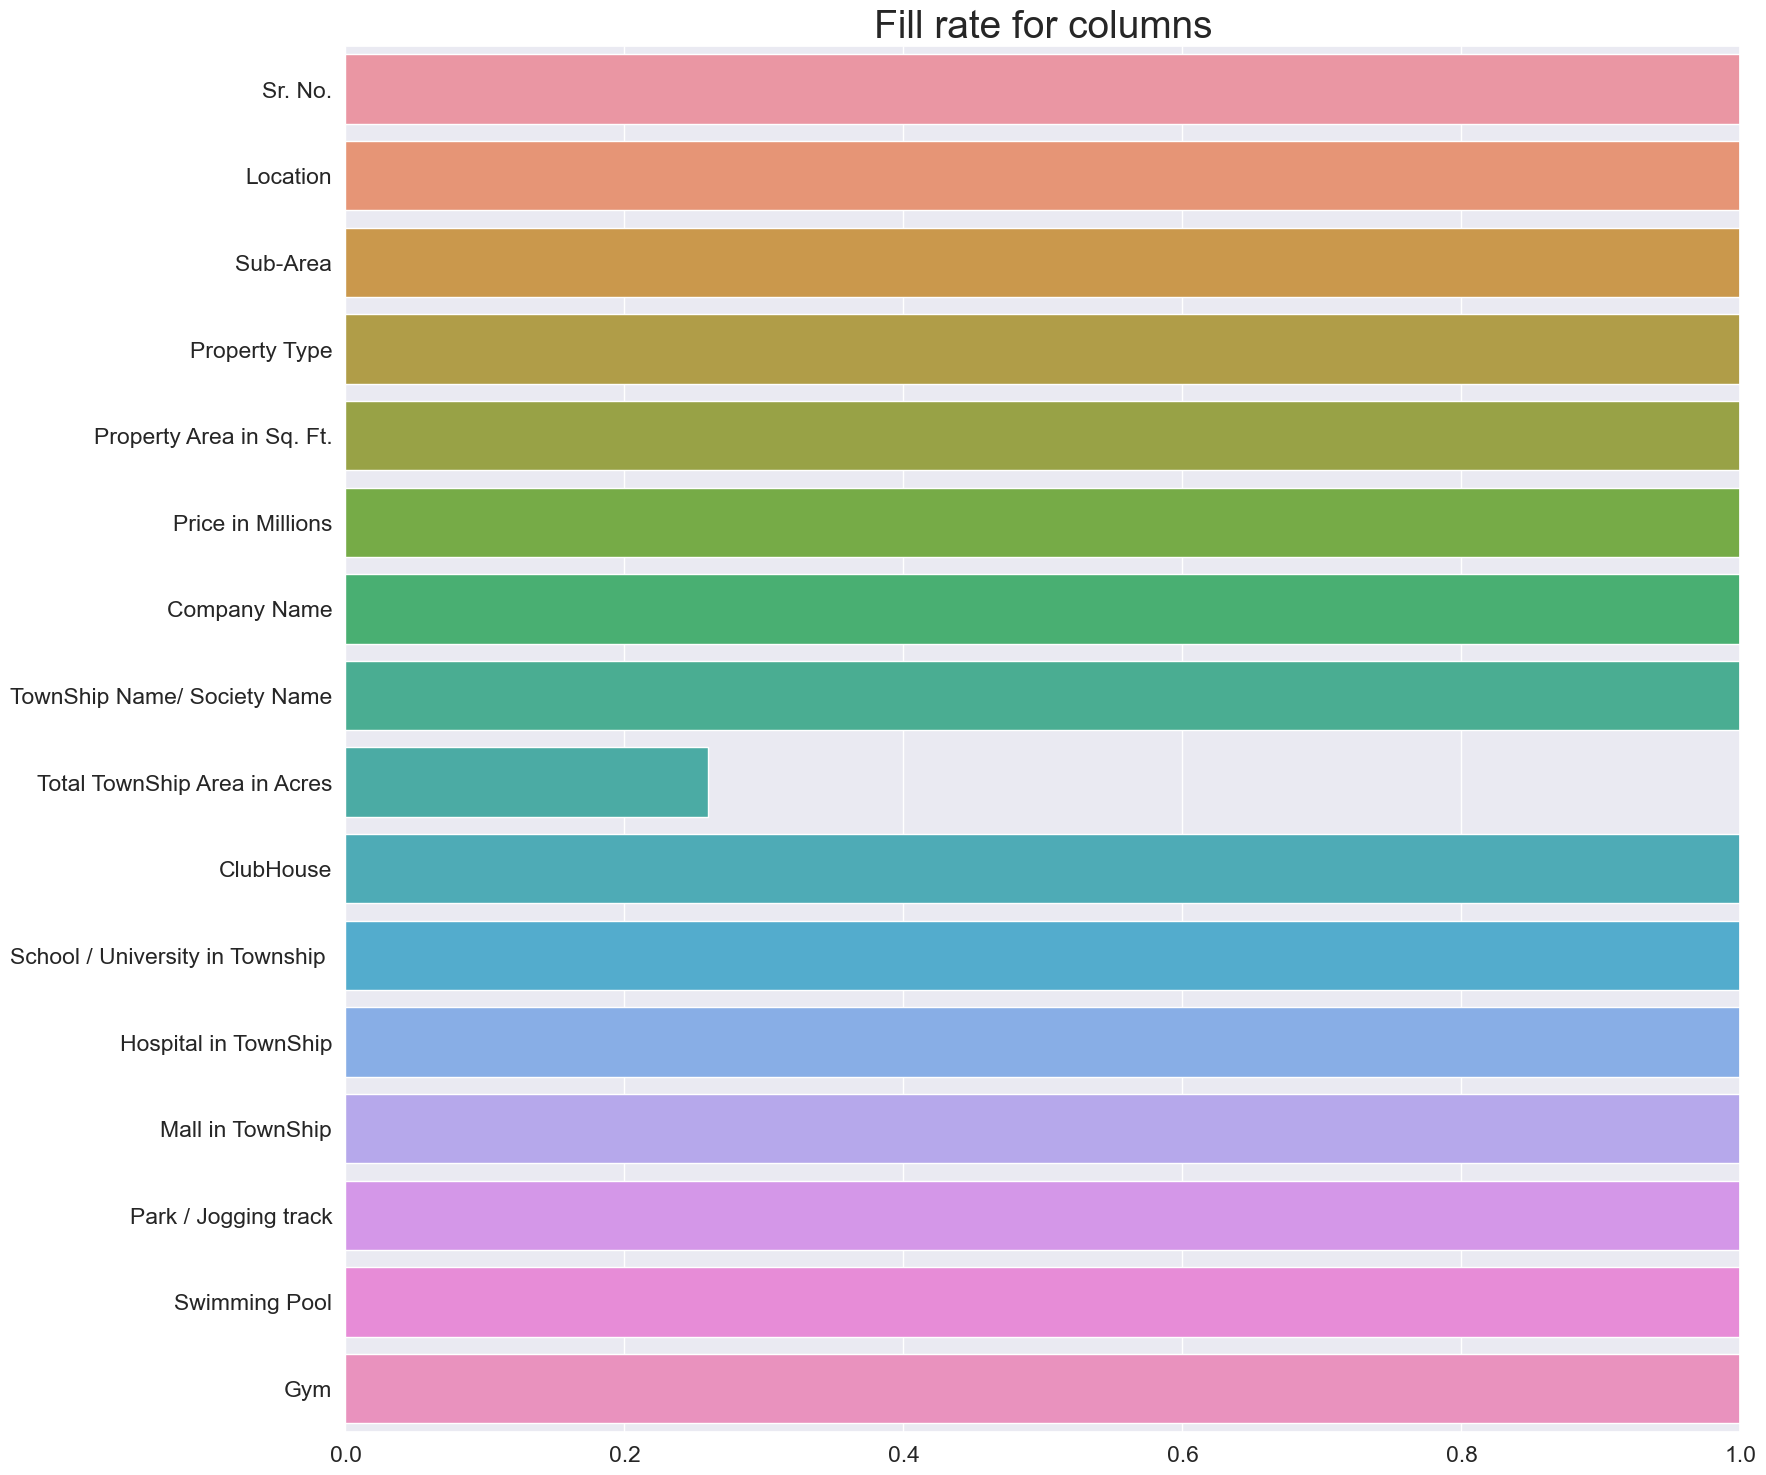

In [37]:
plot_fill_rate( df_norm )

In [38]:
compute_fill_rate( df_norm )

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.260204,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [39]:
# Select and display specific columns from the DataFrame
selected_columns = df_norm[["Sub-Area", "TownShip Name/ Society Name", "Total TownShip Area in Acres"]]

# Sort the DataFrame by "Sub-Area" and reset the index
sorted_dataframe = selected_columns.sort_values("Sub-Area").reset_index(drop=True)


,Sub-Area,TownShip Name/ Society Name,Total TownShip Area in Acres
0,Akurdi,Mantra Sky Tower,3.5
1,Akurdi,Mantra Sky Tower,3.5
2,Akurdi,Mantra Sky Tower,3.5
3,Akurdi,Mantra Sky Tower,3.5
4,Akurdi,Mantra Sky Tower,3.5
5,Akurdi,Mantra Sky Tower,3.5
6,BANER,TEJ ELEVIA,2.5
7,BANER,vtp solitaire,NaN
8,BANER,SUPREME ESTIA,5.0
9,BANER,SUPREME ESTIA,5.0


In [40]:
# Drop columns with less than 50% non-NaN fill rate
df_norm = drop_empty_axis(df_norm, minFillRate=0.5)


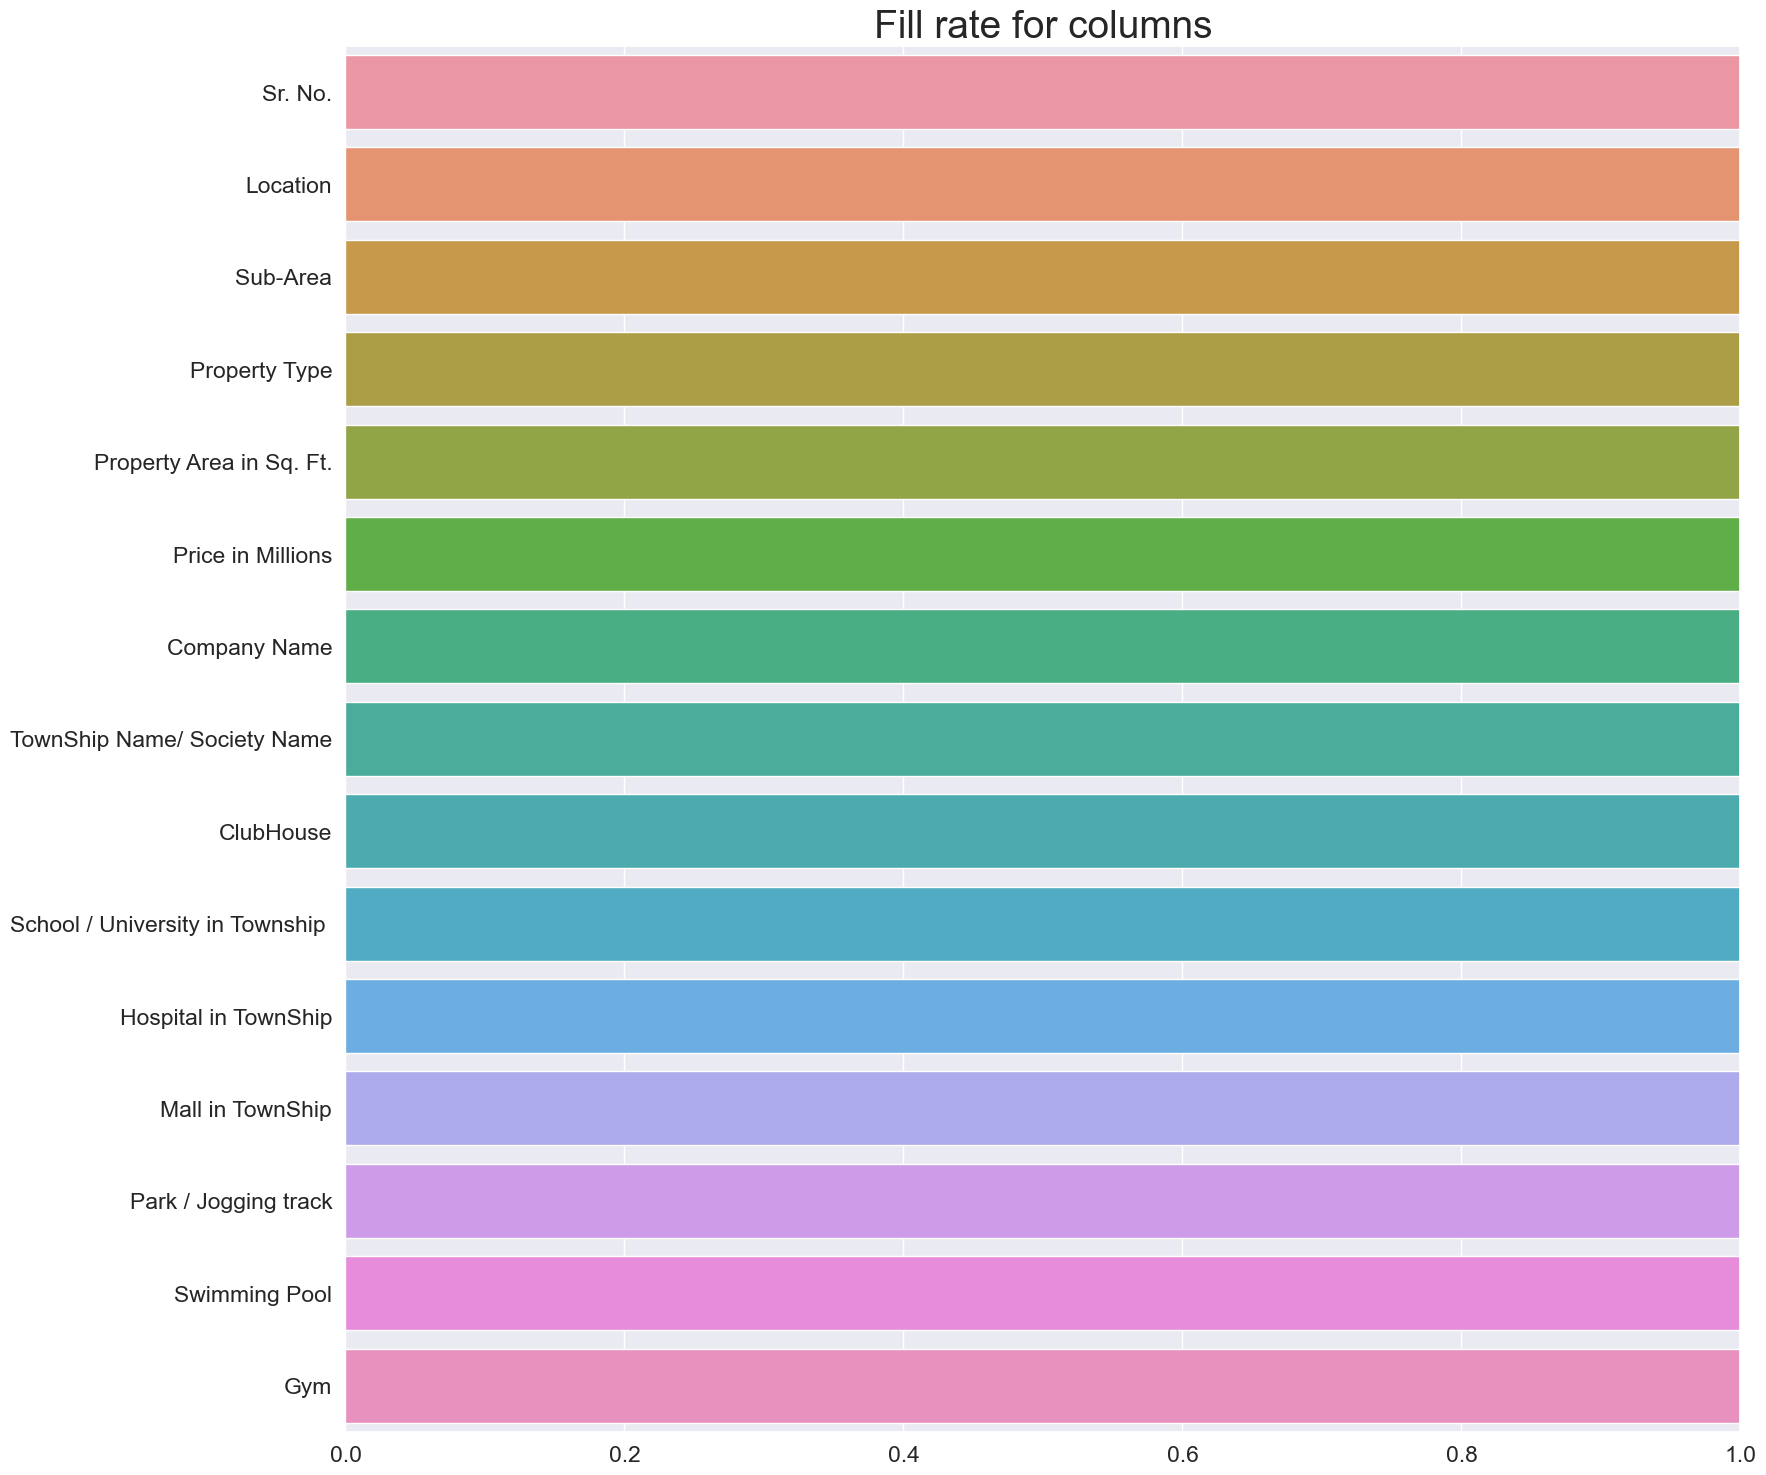

In [41]:
plot_fill_rate(df_norm)

---

## Regularising the categorical columns

In [42]:
df_norm.select_dtypes(include="object").head(3)

,Location,Sub-Area,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,"Pune, Maharashtra, India",Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,"Pune, Maharashtra, India",Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,"Pune, Maharashtra, India",Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes


#### Binary categorical columns

In [43]:
# Select the last 7 columns of the DataFrame and extract their column names into a list
binary_cols = df_norm.iloc[:, -7:].columns.to_list()

binary_cols

['ClubHouse',
 'School / University in Township ',
 'Hospital in TownShip',
 'Mall in TownShip',
 'Park / Jogging track',
 'Swimming Pool',
 'Gym']

In [44]:
def print_uniques(cols, df=df_norm):
    for col in cols:
        # Extract unique values from the specified column and sort them
        list_unique = df[col].unique()
        list_unique.sort()
        
        # Print the column name, unique values, and the number of unique categories
        print(col, ":\n", list_unique)
        print("Number of unique categories:", len(list_unique))
        print("--------------------")


In [45]:
print_uniques(binary_cols)

ClubHouse :
 ['Yes' 'no' 'no ' 'yes']
Number of unique categories: 4
--------------------
School / University in Township  :
 ['No' 'Yes' 'no']
Number of unique categories: 3
--------------------
Hospital in TownShip :
 ['No' 'Yes' 'no']
Number of unique categories: 3
--------------------
Mall in TownShip :
 ['No' 'Yes' 'no' 'no ']
Number of unique categories: 4
--------------------
Park / Jogging track :
 ['No' 'Yes' 'no' 'yes']
Number of unique categories: 4
--------------------
Swimming Pool :
 ['No' 'Yes' 'no' 'no ' 'yes']
Number of unique categories: 5
--------------------
Gym :
 ['Yes' 'no' 'no ' 'yes']
Number of unique categories: 4
--------------------


In [46]:
# Iterate through binary columns and clean the values by stripping leading/trailing spaces and converting to lowercase
for col in binary_cols:
    df_norm[col] = df_norm[col].apply(lambda x: x.strip().lower())

# Print the unique values in the cleaned binary columns
print_uniques(binary_cols)


ClubHouse :
 ['no' 'yes']
Number of unique categories: 2
--------------------
School / University in Township  :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Hospital in TownShip :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Mall in TownShip :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Park / Jogging track :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Swimming Pool :
 ['no' 'yes']
Number of unique categories: 2
--------------------
Gym :
 ['no' 'yes']
Number of unique categories: 2
--------------------


#### Multi-categorical columns

In [47]:
# Identify multi-category columns, which are neither binary nor object type
multiCat_cols = list(set(df_norm.columns) - set(binary_cols) - set(obj_cols))

# 'multiCat_cols' now contains the names of relevant columns
multiCat_cols


['TownShip Name/ Society Name', 'Company Name', 'Sub-Area', 'Location']

In [48]:
# Iterate through each column in 'multiCat_cols'
for col in multiCat_cols:
    # Strip leading and trailing spaces and convert text to lowercase for each cell
    df_norm[col] = df_norm[col].apply(lambda x: x.strip().lower())


In [49]:
print_uniques(multiCat_cols)

TownShip Name/ Society Name :
 ['7hills' 'abitante fiore' 'anp universe' 'anutham' 'atulya kanhe'
 'aureta' 'bhaktamar residency' 'bliss solitaire' 'bluegrass residences'
 'brookefield willows' 'dolphin garima' 'eternia 2.0'
 'godrej hills retreat' 'impero' 'infinity' 'jade residences' 'k ville'
 'kalpataru serenity' 'khush vista' 'kiarah terrazo' 'lesiure town'
 'mahalunge riviera' 'mantra 29 gold' 'mantra insignia' 'mantra monarch'
 'mantra sky tower' 'neco beaumont' 'newton homes' 'om mangalam chaitanya'
 'oxy beaumonde' 'oxy eterno' 'parklane urbanjoy' 'presidenta' 'presidia'
 'puraniks sayama' 'rhythm county' 'river dale residency'
 'satyam serenity' 'satyam shery' 'satyam shivam' 'sensorium' 'simplicity'
 'sportsville' 'sukwani aspire' 'supreme estia' 'tej elevia'
 'tranquility annexe' 'unique legacy royale' 'urban skyline' 'vanaha'
 'vtp blue water' 'vtp cierra' 'vtp solitaire']
Number of unique categories: 53
--------------------
Company Name :
 ['ace constructions' 'anp corp' 

In [50]:
# Remove the "Location" column from the DataFrame 'df_norm' in place
df_norm.drop(columns=["Location"], inplace=True)


In [51]:
df_norm.head() 

,Sr. No.,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in Millions,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,bavdhan,1.0,492.0,3.9,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
1,2,bavdhan,2.0,774.0,6.5,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
2,3,bavdhan,3.0,889.0,7.4,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
3,4,bavdhan,3.0,1018.0,8.9,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
4,5,mahalunge,2.0,743.0,7.4,godrej properties,godrej hills retreat,yes,yes,yes,yes,yes,yes,yes


In [52]:
df_norm.shape

(196, 14)

---

## Saving the cleaned data set

#### Renaming the columns

In [53]:
# Rename the columns of the DataFrame 'df_norm' with new column names
df_norm.columns = ["index", "sub_area", "n_bhk", "surface", "price",
                   "company_name", "township", "club_house", "school",
                   "hospital", "mall", "park", "pool", "gym"]


In [54]:
# Save the DataFrame 'df_norm' to a CSV file at the specified path and filename
df_norm.to_csv("../input/resd_clean.csv", index=False)


---